In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [165]:
df=pd.read_csv("../../survey data/Usability_Testing_of_MOOC_system (1).csv")
grade = pd.read_csv("../../Final_Grade/grade_combined.csv")

In [166]:
df=df.drop(df.columns[[0,1,2,3,4,5,8]],axis=1)
# df.head()

index=2
for i in range(index,len(df.columns)):
    df.columns.values[i]=f"Q{i-1}"
    
df['Full name'] = df['Full name'].str.lower()
df.head()


ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10
0  148  rikesh karmacharya   3   1   4   1   3   3   4   2   3    1
1  442      bibhusan baral   4   3   4   3   3   4   4   3   2    4
2  473        satyam karki   4   2   4   3   3   2   5   3   4    3
3  478    shubh raj dhital   5   2   5   1   4   3   5   3   5    2
4  525      roshan shreesh   4   2   3   1   4   2   4   1   4    1

In [167]:
inversion=[2,4,6,8,10]

def invert_score(x):
    if x==1:return 5
    if x==2:return 4
    if x==3:return 3
    if x==4:return 2
    if x==5:return 1

for i in inversion :
    df.iloc[:,i+1]=df.iloc[:,i+1].apply(invert_score)

df.head()

ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10
0  148  rikesh karmacharya   3   5   4   5   3   3   4   4   3    5
1  442      bibhusan baral   4   3   4   3   3   2   4   3   2    2
2  473        satyam karki   4   4   4   3   3   4   5   3   4    3
3  478    shubh raj dhital   5   4   5   5   4   3   5   3   5    4
4  525      roshan shreesh   4   4   3   5   4   4   4   5   4    5

In [168]:
df["score"]=df.iloc[:,2:11].mean(axis=1)
df["round"]=df["score"].apply(lambda x: round(x))
df.head()

ID           Full name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10     score  \
0  148  rikesh karmacharya   3   5   4   5   3   3   4   4   3    5  3.777778   
1  442      bibhusan baral   4   3   4   3   3   2   4   3   2    2  3.111111   
2  473        satyam karki   4   4   4   3   3   4   5   3   4    3  3.777778   
3  478    shubh raj dhital   5   4   5   5   4   3   5   3   5    4  4.333333   
4  525      roshan shreesh   4   4   3   5   4   4   4   5   4    5  4.111111   

   round  
0      4  
1      3  
2      4  
3      4  
4      4

In [169]:
df['Name'] = df['Full name'].str.lower()
df = df.drop(columns=['Full name'])

<Axes: >

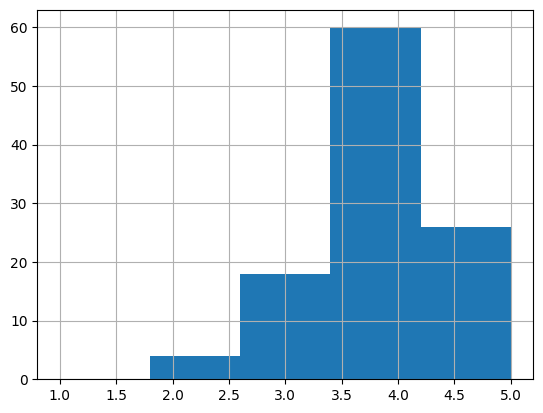

In [170]:
# df["score"].hist(bins=10,title="Adaptability Score Distribution ",xlabel="Adaptability score",ylabel="frequency")
import matplotlib as plt

df["score"].hist(bins=5,range=(1,5))




<Axes: xlabel='score', ylabel='Density'>

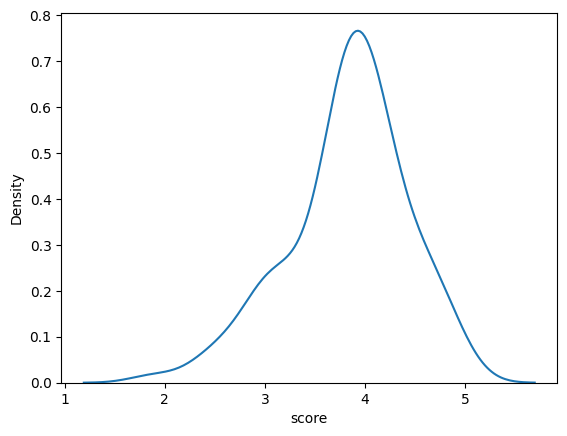

In [171]:
sns.kdeplot(df['score'],label="Density")

## Grade combined with Mooc acceptance

In [172]:
# Define a dictionary to map old names to new names
name_changes = {
    'ankit kumar karna': 'ankit karna',
    'anup raj niroula': 'anup niroula',
    'hrishav raghu shrestha': 'hrishav shrestha',
    'aadil tuladhar': 'adil tuladhar',
    'nischal chand': 'nischal thakuri',
    'shreeyash laya-la shrestha': 'shreeyash shrestha',
}

# Apply the name changes
mooc_grade['Name'] = mooc_grade['Name'].replace(name_changes)


In [173]:
# Merge dataframes on the 'Name' column
mooc_grade = pd.merge(df, grade[['Name', 'Score', 'GRADE']], on='Name', how='left')

In [174]:

mooc_grade['grade_score'] = mooc_grade['Score']
mooc_grade = mooc_grade.drop(columns=['Score'])

In [175]:
mooc_grade.isna().sum()

ID             0
Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
score          0
round          0
Name           0
GRADE          0
grade_score    0
dtype: int64

In [176]:
nan_grades = mooc_grade[mooc_grade['GRADE'].isna()]
print("\nStudents without grades:")
print(nan_grades['Name'])


Students without grades:
Series([], Name: Name, dtype: object)


There were some name inconsistent between name in grade and in the survey data

In [177]:
mooc_grade

ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10     score  round  \
0     148   3   5   4   5   3   3   4   4   3    5  3.777778      4   
1     442   4   3   4   3   3   2   4   3   2    2  3.111111      3   
2     473   4   4   4   3   3   4   5   3   4    3  3.777778      4   
3     478   5   4   5   5   4   3   5   3   5    4  4.333333      4   
4     525   4   4   3   5   4   4   4   5   4    5  4.111111      4   
..    ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...    ...   
103  2255   4   4   4   5   4   4   4   4   4    3  4.111111      4   
104  2256   4   4   4   5   3   3   5   4   4    4  4.000000      4   
105  2257   4   4   2   4   4   3   4   4   4    4  3.666667      4   
106  2258   4   4   4   5   3   4   4   4   3    4  3.888889      4   
107  2260   4   4   4   4   5   4   4   5   4    5  4.222222      4   

                   Name GRADE  grade_score  
0    rikesh karmacharya    A-         76.0  
1        bibhusan baral     A         80.0  
2          satyam karki    A-         75.0  
3      shubh raj dhital     B         67.0  
4        roshan shreesh    C+         55.0  
..                  ...   ...          ...  
103      minusha gurung    A-         78.0  
104       pratik khadka    A-         75.0  
105        niraj tamang    B+         74.0  
106         bishal shah    A-         78.0  
107     asmita dhungana    A-         79.0  

[108 rows x 16 columns]

In [178]:
# Group by 'round' and calculate the 'average_mooc_score'

# Group by 'round' and calculate the mean, max, min, Q1, and Q3 'Score'
aggregated_scores = mooc_grade.groupby('round')['grade_score'].agg(['mean', 'max', 'min', 'quantile', lambda x: x.quantile(0.75)]).reset_index()


# Rename columns for better readability
aggregated_scores = aggregated_scores.rename(columns={
    'round' : 'mooc Score',
    'mean': 'Average_Score',
    'max': 'Highest_Score',
    'min': 'Lowest_Score',
    'quantile': 'Q1_Score',
    '<lambda_0>': 'Q3_Score'
})

# Display the resulting dataframe
print(aggregated_scores)

   mooc Score  Average_Score  Highest_Score  Lowest_Score  Q1_Score  Q3_Score
0           2      72.333333           80.0          66.0      71.0      75.5
1           3      75.000000           91.0          60.0      75.0      80.0
2           4      76.333333           92.0          55.0      77.0      79.0
3           5      79.307692           92.0          72.0      78.0      84.0


In [179]:
# Define function to map scores to grades
def assign_grade(score):
    if score >= 80:
        return 'A'
    elif 75 <= score < 80:
        return 'A-'
    elif 70 <= score < 75:
        return 'B+'
    elif 65 <= score < 70:
        return 'B'
    elif 60 <= score < 65:
        return 'B-'
    elif 55 <= score < 60:
        return 'C+'
    elif 50 <= score < 55:
        return 'C'
    elif 45 <= score < 50:
        return 'C-'
    else:
        return 'F'

In [180]:

# Apply the function to the 'Score' column to create the 'Average_Grade' column
aggregated_scores['Average_Grade'] = aggregated_scores['Average_Score'].apply(assign_grade)


### Classified scores of Students with various Scores in MOOC survey

In [181]:
aggregated_scores

mooc Score  Average_Score  Highest_Score  Lowest_Score  Q1_Score  Q3_Score  \
0           2      72.333333           80.0          66.0      71.0      75.5   
1           3      75.000000           91.0          60.0      75.0      80.0   
2           4      76.333333           92.0          55.0      77.0      79.0   
3           5      79.307692           92.0          72.0      78.0      84.0   

  Average_Grade  
0            B+  
1            A-  
2            A-  
3            A-

# Model Training and Evaluation

## Using Regression Model

### Linear Regression Model

In [182]:

def train_linear_regression(X_train, y_train):
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

### Random Forest Model

In [183]:
def train_random_forest(X_train, y_train):
    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model


### Evaluation

In [184]:
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    
    #mean square error
    mse = mean_squared_error(y_test, y_pred)
    
    #r2 score
    r2 = r2_score(y_test, y_pred)

    return mse, r2, y_pred

### Visual Plot

In [185]:
# Function to plot the results
def plot_results(X_test, y_test, y_pred, title):
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Survey Score')
    plt.ylabel('Grade Score')
    plt.legend()
    plt.show()

### Split Data with Train and Test

In [186]:
def split_data(df, test_size=0.2, random_state=42):
    X = df[['score']]
    y = df['grade_score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

### Implementing Model and evaluation

Linear Regression MSE: 51.98, R2: -0.15


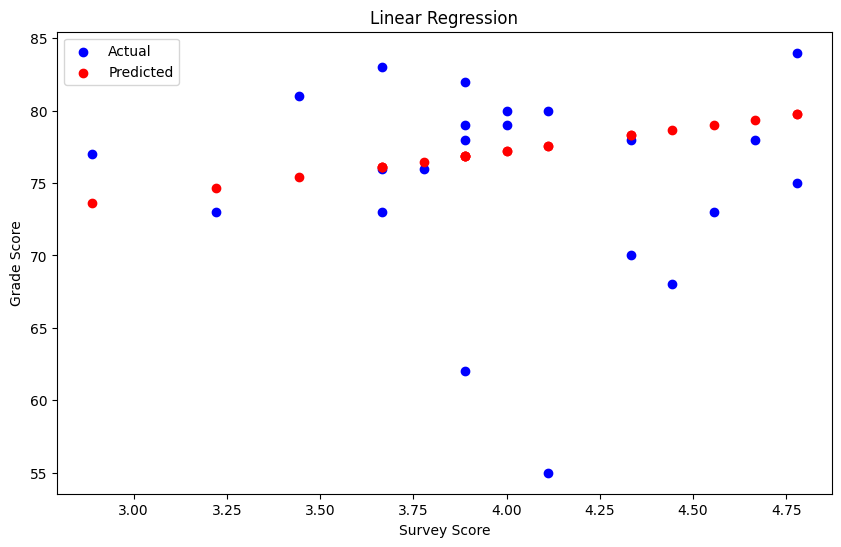

Random Forest Regression MSE: 63.23, R2: -0.40


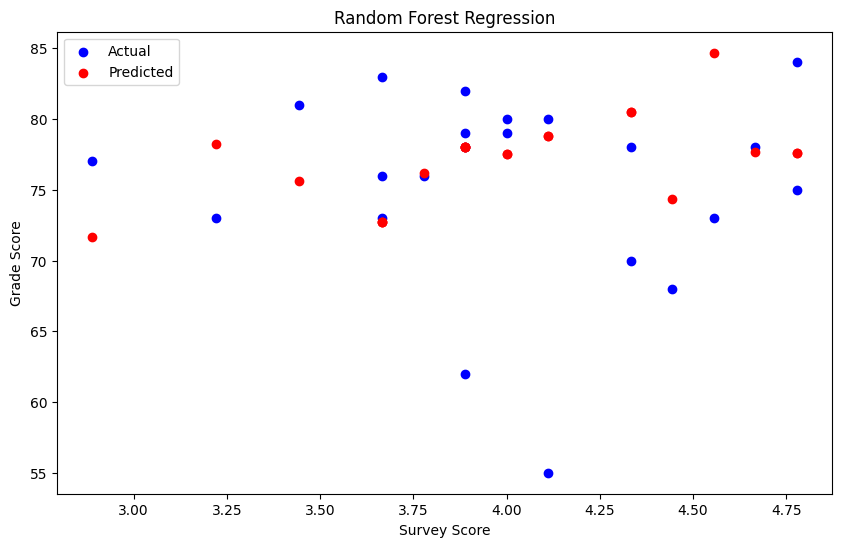

In [187]:
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = split_data(mooc_grade)

# Train and evaluate Linear Regression
lr_model = train_linear_regression(X_train, y_train)
mse_lr, r2_lr, y_pred_lr = evaluate_model(lr_model, X_test, y_test)
print(f'Linear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
plot_results(X_test, y_test, y_pred_lr, 'Linear Regression')

# Train and evaluate Random Forest Regression
rf_model = train_random_forest(X_train, y_train)
mse_rf, r2_rf, y_pred_rf = evaluate_model(rf_model, X_test, y_test)
print(f'Random Forest Regression MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')
plot_results(X_test, y_test, y_pred_rf, 'Random Forest Regression')

## Using CLassification Models

### logistic Regression

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_and_test_classification_model(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the classification model
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    # Test the model
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report


# Use grades as features and rounded survey scores as labels
X = mooc_grade[['grade_score']]
y = mooc_grade['round']

# Train and test the classification model
accuracy, report = train_and_test_classification_model(X, y)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.64
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.67      0.93      0.78        15
           5       0.00      0.00      0.00         4

    accuracy                           0.64        22
   macro avg       0.22      0.31      0.26        22
weighted avg       0.45      0.64      0.53        22



/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ranjan/Projects/MOOC/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

The logistic regression model achieved an accuracy of 0.64 on the test data. However, the classification report reveals that the model performs poorly on certain classes. For instance, it fails to predict any instances of class 3 and class 5, resulting in precision, recall, and F1-score of 0.00 for these classes. The model performs relatively better on class 4 with a precision of 0.67 and recall of 0.93.

It's important to note the warning messages regarding precision being ill-defined due to no predicted samples for certain classes. This indicates that the model may require further optimization or alternative approaches to improve its performance, especially for the minority classes.

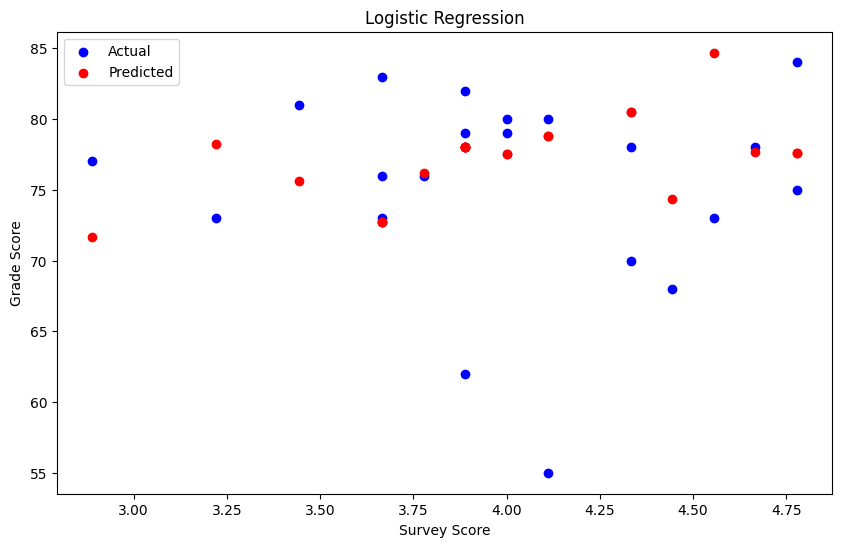

In [189]:
plot_results(X_test, y_test, y_pred_rf, 'Logistic Regression')

### SVM and GradientBoostingRegressor

Support Vector Regression MSE: 50.13, R2: -0.11


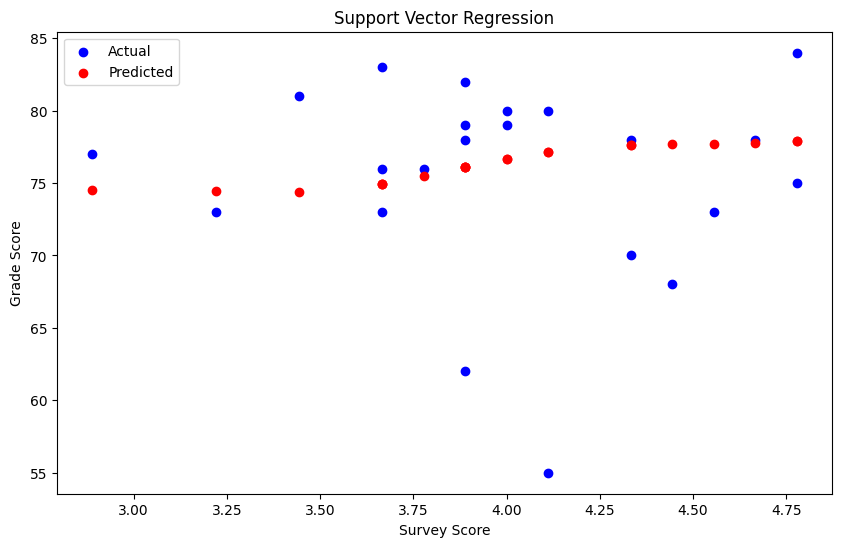

Gradient Boosting Regression MSE: 71.64, R2: -0.58


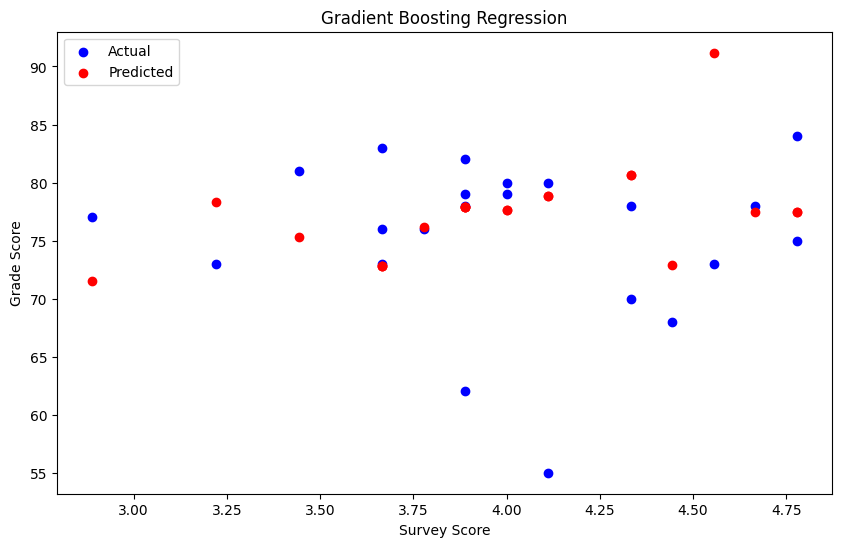

In [190]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Function to train Support Vector Regression
def train_svr(X_train, y_train):

    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)
    return model

# Function to train Gradient Boosting Regression
def train_gradient_boosting(X_train, y_train):
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Split the data
X_train, X_test, y_train, y_test = split_data(mooc_grade)

# Train and evaluate Support Vector Regression
svr_model = train_svr(X_train, y_train)
mse_svr, r2_svr, y_pred_svr = evaluate_model(svr_model, X_test, y_test)
print(f'Support Vector Regression MSE: {mse_svr:.2f}, R2: {r2_svr:.2f}')

# Plot results for Support Vector Regression
plot_results(X_test, y_test, y_pred_svr, 'Support Vector Regression')

# Train and evaluate Gradient Boosting Regression
gb_model = train_gradient_boosting(X_train, y_train)
mse_gb, r2_gb, y_pred_gb = evaluate_model(gb_model, X_test, y_test)
print(f'Gradient Boosting Regression MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}')

# Plot results for Gradient Boosting Regression
plot_results(X_test, y_test, y_pred_gb, 'Gradient Boosting Regression')

# Findings and Discussion

#### Regression Models Analysis:
The regression models evaluated on this dataset exhibited poor performance, as indicated by the negative R² values across all models. This suggests that the models are not able to effectively capture the variance in the data. However, we can compare their relative performance based on the Mean Squared Error (MSE) metric.

* Support Vector Regression (SVR) achieved the lowest MSE of 50.13, indicating slightly better performance compared to Linear Regression and Random Forest Regression.

* Linear Regression performed reasonably with an MSE of 51.98, outperforming Random Forest Regression.

* Random Forest Regression had the highest MSE of 63.23, indicating the poorest performance among the evaluated regression models.

* Gradient Boosting Regression exhibited the worst performance with an MSE of 71.64.

|Model|MSE|R²|
|:-----|:---|:--|
|Linear Regression|51.98|-0.15|
|Random Forest Regression|63.23|-0.40|
|Support Vector Regression|50.13|-0.11|
|Gradient Boosting Regression|71.64|-0.58|

#### Logistic Regression:
The Logistic Regression model achieved a moderate accuracy of 0.64 on the given dataset. However, the class-wise performance metrics reveal some imbalances:

* Class 4 had the highest precision (0.67) and recall (0.93), suggesting that the model was able to identify this class reasonably well.
* Classes 3 and 5 had zero precision and recall, indicating that the model failed to predict these classes correctly.
* The macro-averaged F1-score of 0.26 indicates poor overall performance when considering all classes equally.
* The weighted average F1-score of 0.53 suggests better performance when accounting for class imbalances.

|Metric|Class 3|Class 4|Class 5|Accuracy|Macro Avg|Weighted Avg|
|-----|---|--|-----|---|--|-----|
|Precision|0.00|0.67|0.00|0.64|0.22|0.45|
|Recall|0.00|0.93|0.00|-|0.31|0.64|
|F1-Score|0.00|0.78|0.00|-|0.26|0.53|
|Support|3|15|4|22|22|22|

#### Discussion
The regression models evaluated on this dataset exhibited poor performance in capturing the variance in the data, as evident from the negative R² values. Among the regression models, Support Vector Regression (SVR) performed slightly better than Linear Regression and Random Forest Regression in terms of Mean Squared Error (MSE).

The Logistic Regression model achieved moderate accuracy but struggled with class imbalances, as it predominantly predicted class 4 while failing to identify classes 3 and 5 correctly. This suggests that the model may benefit from techniques to handle class imbalances, such as oversampling, undersampling, or class weighting.

It is important to note that these results are based on the provided dataset and evaluation metrics. Further analysis, feature engineering, and model tuning may be necessary to improve the performance of these models on this specific problem.

The results indicate that SVR performed slightly better than Linear Regression and Random Forest Regression in terms of MSE and R², although all regression models exhibited negative R² values, indicating that they do not explain the variance in the data well. Logistic Regression showed a moderate accuracy of 0.64, with class 4 being the only class with non-zero precision and recall, suggesting the model's tendency to predict this class predominantly.